In [1]:
# why using pre trained embedding is not helpful - https://datascience.stackexchange.com/questions/92856/the-reason-behind-using-a-pre-trained-model

In [2]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score


In [3]:
def train_and_evaluate(texts, labels):
    X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.2, random_state=42)
    
    representation_methods = {
        'Bag of Words': CountVectorizer(),
        'TF-IDF': TfidfVectorizer(),
        'N-grams': CountVectorizer(ngram_range=(1, 2)),
    }
    
    best_model = None
    best_accuracy = 0
    best_method = ""
    
    for name, vectorizer in representation_methods.items():
        model = make_pipeline(vectorizer, MultinomialNB())
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        print(f"{name} Accuracy: {accuracy:.4f}")
        
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_model = model
            best_method = name
    
    return best_model, best_method


In [4]:
def predict_text(model, text):
    prediction = model.predict([text])[0]
    prediction_prob = model.predict_proba([text])[0]
    confidence = prediction_prob[prediction]
    status = "AI-written" if prediction == 0 else "Human-written"
    print(f"Prediction: {status}, Confidence: {confidence:.4f}")


In [5]:
df = pd.read_csv('Generated_Data.csv')

In [6]:
df.head()

,Unnamed: 0,Question,Text,LABEL
0,7919,"In ""The Challenge of Exploring Venus,"" the aut...","In this aricle , the author its trying to you ...",1
1,22,Write a letter to your state senator in which ...,"Dear State Senator, I am writing to you today...",0
2,18,Your principal is considering changing school ...,"Dear Principal, I am writing to share my view...",0
3,13,"In the article ""Making Mona Lisa Smile,"" the a...",The recent development of facial recognition ...,0
4,6249,Your principal has decided that all students m...,Students shouldn't need to participate in extr...,1


In [7]:
sample_question = df['Question'][0]
print(sample_question)

In "The Challenge of Exploring Venus," the author suggests studying Venus is a worthy pursuit despite the dangers it presents. Using details from the article, write an essay evaluating how well the author supports this idea. Be sure to include: a claim that evaluates how well the author supports the idea that studying Venus is a worthy pursuit despite the dangers; an explanation of the evidence from the article that supports your claim; an introduction, a body, and a conclusion to your essay.


In [8]:
text = df['Text']
label = df['LABEL']

In [9]:
best_model, best_method = train_and_evaluate(text, label)

Bag of Words Accuracy: 0.6667
TF-IDF Accuracy: 0.5833
N-grams Accuracy: 0.6667


In [10]:
#ai model
new_text = "The exploration of Venus, often regarded as Earth's twin, has long captivated the imagination of scientists and space enthusiasts alike. However, the hostile conditions on Venus present significant challenges to exploration. In the article 'The Challenge of Exploring Venus,' the author argues that despite these dangers, studying Venus remains a worthy pursuit. This essay evaluates the authors support for this idea by examining the evidence presented in the article."
predict_text(best_model, new_text)

Prediction: AI-written, Confidence: 1.0000


## Complete Data

In [11]:
mistral_df = pd.read_csv("mistral_data.csv")

In [12]:
texts = mistral_df['Text']
labels = mistral_df['LABEL']

In [13]:
best_model, best_method = train_and_evaluate(texts, labels)

Bag of Words Accuracy: 0.9833
TF-IDF Accuracy: 0.9333
N-grams Accuracy: 0.9833


In [14]:
#ai
new_text = "The exploration of Venus, often regarded as Earth's twin, has long captivated the imagination of scientists and space enthusiasts alike. However, the hostile conditions on Venus present significant challenges to exploration. In the article 'The Challenge of Exploring Venus,' the author argues that despite these dangers, studying Venus remains a worthy pursuit. This essay evaluates the authors support for this idea by examining the evidence presented in the article."
predict_text(best_model, new_text)

Prediction: AI-written, Confidence: 1.0000


In [15]:
#human
txt = 'Humans should not use mobile phone while driving as it can lead to potential accident as the driver might get distracted and not focus on the road'
predict_text(best_model, txt)

Prediction: AI-written, Confidence: 0.6670


In [16]:
#paraphrased
txt = "In the fast-paced world of today, cell phones have become essential. However, given the high number of distracted driving incidents, their use while driving has come under scrutiny. Some contend that cell phone usage by drivers should be permitted under specific situations, while others think it should be strictly forbidden. I believe that using a cell phone in any way while operating a car is prohibited for drivers. First of all, using a cell phone while operating a vehicle is a serious distraction that raises the risk of collisions. The National Highway Traffic Safety Administration reports that 3,142 people died as a result of distracted driving in 2019. Distracted driving occurs when a driver uses a cell phone while operating a vehicle, diverting their focus from the road."
predict_text(best_model, txt)

Prediction: AI-written, Confidence: 1.0000


# SVM

In [17]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [18]:
def train_svm_model(texts, labels, kernel='rbf'):
    model = Pipeline([
        ('tfidf', TfidfVectorizer()),
        ('svm', SVC(kernel=kernel, probability=True))
    ])

    X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.2, random_state=42)

    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print(classification_report(y_test, predictions))
    
    return model

In [19]:
model_sample = train_svm_model(text, label)

              precision    recall  f1-score   support

           0       1.00      0.17      0.29         6
           1       0.55      1.00      0.71         6

    accuracy                           0.58        12
   macro avg       0.77      0.58      0.50        12
weighted avg       0.77      0.58      0.50        12



In [20]:
def predict_with_confidence(model, new_texts):
    for text in new_texts:
        prediction = model.predict([text])[0]
        prediction_prob = model.predict_proba([text])[0]
        confidence = max(prediction_prob)
        status = "AI-written" if prediction == 0 else "Human-written"
        print(f"Prediction: {status}, Confidence: {confidence:.4f}")


In [21]:
#human written
txt = 'Humans should not use mobile phone while driving as it can lead to potential accident as the driver might get distracted and not focus on the road'
predict_with_confidence(model_sample, [txt])

Prediction: AI-written, Confidence: 0.5673


In [22]:
#ai written
txt = "Cell phones have become a necessity in today's fast-paced world. However, their use while driving has become a topic of debate due to the numerous accidents caused by distracted driving. While some argue that drivers should be allowed to use cell phones in certain capacities, others believe that their use while driving should be completely prohibited. In my opinion, drivers should not be able to use cell phones in any capacity while operating a vehicle. Firstly, using a cell phone while driving is a significant distraction that can lead to accidents. According to the National Highway Traffic Safety Administration, distracted driving claimed 3,142 lives in 2019. Cell phone use while driving is a form of distracted driving that takes the driver's attention away from the road, increasing the risk of accidents. Secondly, using a cell phone while driving impairs the driver's ability to react to changing road conditions. Studies have shown that drivers who use cell phones while driving have slower reaction times, making it difficult for them to avoid accidents. Moreover, using a cell phone while driving can also lead to tunnel vision, where the driver's peripheral vision is compromised, making it difficult to see other vehicles, pedestrians, or obstacles on the road. Thirdly, using a hands-free device while driving is not a safe alternative. While some argue that hands-free devices are safer than hand"
predict_with_confidence(model_sample, [txt])

Prediction: AI-written, Confidence: 0.6610


In [23]:
#paraphrased 
txt = "In the fast-paced world of today, cell phones have become essential. However, given the high number of distracted driving incidents, their use while driving has come under scrutiny. Some contend that cell phone usage by drivers should be permitted under specific situations, while others think it should be strictly forbidden. I believe that using a cell phone in any way while operating a car is prohibited for drivers. First of all, using a cell phone while operating a vehicle is a serious distraction that raises the risk of collisions. The National Highway Traffic Safety Administration reports that 3,142 people died as a result of distracted driving in 2019. Distracted driving occurs when a driver uses a cell phone while operating a vehicle, diverting their focus from the road."
predict_with_confidence(model_sample, [txt])

Prediction: AI-written, Confidence: 0.6461


In [24]:
model_final = train_svm_model(texts, labels)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99        66
           1       1.00      0.98      0.99        54

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120



In [25]:
#human written
txt = 'Humans should not use mobile phone while driving as it can lead to potential accident as the driver might get distracted and not focus on the road'
predict_with_confidence(model_final, [txt])

Prediction: AI-written, Confidence: 0.8627


In [26]:
#ai written
txt = "Cell phones have become a necessity in today's fast-paced world. However, their use while driving has become a topic of debate due to the numerous accidents caused by distracted driving. While some argue that drivers should be allowed to use cell phones in certain capacities, others believe that their use while driving should be completely prohibited. In my opinion, drivers should not be able to use cell phones in any capacity while operating a vehicle. Firstly, using a cell phone while driving is a significant distraction that can lead to accidents. According to the National Highway Traffic Safety Administration, distracted driving claimed 3,142 lives in 2019. Cell phone use while driving is a form of distracted driving that takes the driver's attention away from the road, increasing the risk of accidents. Secondly, using a cell phone while driving impairs the driver's ability to react to changing road conditions. Studies have shown that drivers who use cell phones while driving have slower reaction times, making it difficult for them to avoid accidents. Moreover, using a cell phone while driving can also lead to tunnel vision, where the driver's peripheral vision is compromised, making it difficult to see other vehicles, pedestrians, or obstacles on the road. Thirdly, using a hands-free device while driving is not a safe alternative. While some argue that hands-free devices are safer than hand"
predict_with_confidence(model_final, [txt])

Prediction: AI-written, Confidence: 0.9999


In [27]:
#paraphrased 
txt = "In the fast-paced world of today, cell phones have become essential. However, given the high number of distracted driving incidents, their use while driving has come under scrutiny. Some contend that cell phone usage by drivers should be permitted under specific situations, while others think it should be strictly forbidden. I believe that using a cell phone in any way while operating a car is prohibited for drivers. First of all, using a cell phone while operating a vehicle is a serious distraction that raises the risk of collisions. The National Highway Traffic Safety Administration reports that 3,142 people died as a result of distracted driving in 2019. Distracted driving occurs when a driver uses a cell phone while operating a vehicle, diverting their focus from the road."
predict_with_confidence(model_final, [txt])

Prediction: AI-written, Confidence: 0.9986


## Random Forest

In [28]:
import spacy
import nltk
from textblob import TextBlob
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import numpy as np
from tqdm import tqdm 

nlp = spacy.load("en_core_web_sm")

def extract_features(doc):
    spacy_doc = nlp(doc)
    blob = TextBlob(doc)

    avg_sent_len = np.mean([len(sent) for sent in spacy_doc.sents])
    sentiment_polarity = blob.sentiment.polarity
    sentiment_subjectivity = blob.sentiment.subjectivity
    lexical_diversity = len(set([token.text for token in spacy_doc])) / len(spacy_doc)
    noun_phrases_count = len(blob.noun_phrases)

    return pd.Series({
        'avg_sent_len': avg_sent_len,
        'sentiment_polarity': sentiment_polarity,
        'sentiment_subjectivity': sentiment_subjectivity,
        'lexical_diversity': lexical_diversity,
        'noun_phrases_count': noun_phrases_count
    })

def prepare_dataset(texts, labels):
    features_list = []  

    for text in tqdm(texts):
        features = extract_features(str(text))
        features_list.append(features)

    feature_df = pd.DataFrame(features_list)

    return feature_df, np.array(labels)

In [29]:
x, y = prepare_dataset(texts, labels)

100%|███████████████████████████████████████████████████████████████████████| 600/600 [00:39<00:00, 15.27it/s]


In [30]:
x

,avg_sent_len,sentiment_polarity,sentiment_subjectivity,lexical_diversity,noun_phrases_count
0,35.333333,0.183333,0.427778,0.740566,26.0
1,20.833333,0.132336,0.413255,0.448000,27.0
2,18.853659,0.150628,0.556361,0.398448,54.0
3,24.800000,0.197917,0.441250,0.762097,29.0
4,21.421053,0.039841,0.427230,0.584767,47.0
...,...,...,...,...,...
595,22.400000,0.151667,0.466714,0.750000,27.0
596,25.888889,0.241667,0.574510,0.506438,21.0
597,25.100000,0.134583,0.452083,0.760956,28.0
598,22.888889,0.130833,0.356389,0.325243,24.0


In [31]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.70      0.78        66
           1       0.71      0.89      0.79        54

    accuracy                           0.78       120
   macro avg       0.80      0.79      0.78       120
weighted avg       0.80      0.78      0.78       120



In [32]:
x_sample = text[9]
y_sample = label[9]

print(y_sample)

x_sample, y_sample = prepare_dataset([x_sample], [y_sample])

0


100%|███████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 19.15it/s]


In [117]:
x_sample

,avg_sent_len,sentiment_polarity,sentiment_subjectivity,lexical_diversity,noun_phrases_count
0,22.846154,0.026833,0.369167,0.518519,38.0


In [118]:
clf.predict_proba(x_sample)

array([[0.74, 0.26]])

In [119]:
y_sample

array([0])

## Just human data

In [120]:
persuade_df = pd.read_csv("persuade.csv")
filtered_df = persuade_df['assignment'].iloc[400:500]
filtered_df_label = np.ones(shape = [100])

In [121]:
print(filtered_df.shape, filtered_df_label.shape)

(100,) (100,)


In [122]:
x_filtered, y_filtered = prepare_dataset(filtered_df, filtered_df_label)

100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 96.65it/s]


In [123]:
print(x_filtered.shape, y_filtered.shape)

(100, 5) (100,)


In [124]:
y_filtered_predict = clf.predict(x_filtered)

In [125]:
np.sum(y_filtered_predict[y_filtered_predict == y_filtered])

0

In [126]:
y_filtered_predict[0:100]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [127]:
y_filtered_prob = clf.predict_proba(x_filtered)

In [128]:
y_filtered_prob[0:10]

array([[0.79, 0.21],
       [0.79, 0.21],
       [0.79, 0.21],
       [0.79, 0.21],
       [0.79, 0.21],
       [0.79, 0.21],
       [0.79, 0.21],
       [0.79, 0.21],
       [0.79, 0.21],
       [0.79, 0.21]])

## PCA

In [129]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [134]:
features = ['avg_sent_len', 'sentiment_polarity', 'sentiment_subjectivity', 'lexical_diversity', 'noun_phrases_count']
x_pca = x.loc[:, features].values
y_pca = pd.Series(y)

In [135]:
#standardise the variables 
x_pca = StandardScaler().fit_transform(x_pca)

In [153]:
pca = PCA(n_components=1)
principalComponents = pca.fit_transform(x_pca)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1'])

In [154]:
finalDf = pd.concat([principalDf, y_pca], axis = 1)

In [159]:
len(finalDf)

600

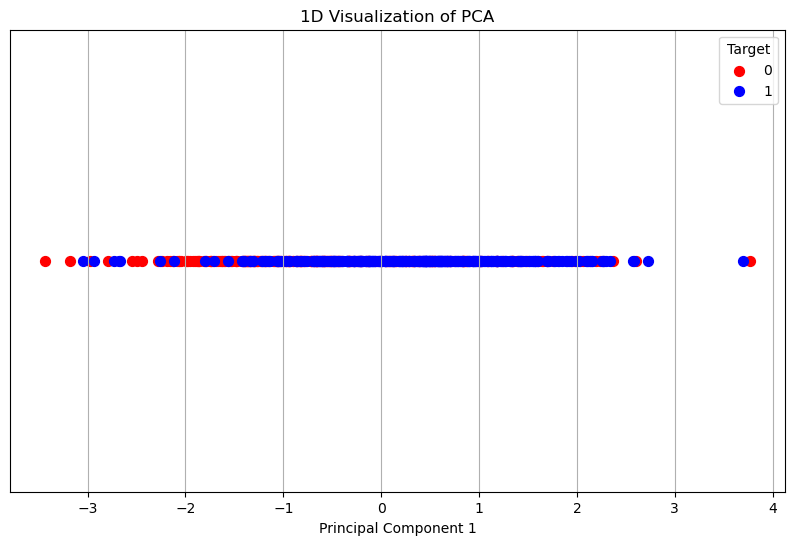

In [162]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

targets = [0, 1]
colors = ['r', 'b']

for target, color in zip(targets, colors):
    indicesToKeep = finalDf[0] == target 
    y_pos = [0] * len(finalDf.loc[indicesToKeep])
    plt.scatter(finalDf.loc[indicesToKeep, 'principal component 1'],
                y_pos,
                c=color, s=50, label=target)
    
plt.xlabel('Principal Component 1')
plt.yticks([]) 
plt.title('1D Visualization of PCA')
plt.legend(title='Target')
plt.grid(True, axis='x')  
plt.show()


In [163]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x_pca)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

In [164]:
finalDf = pd.concat([principalDf, y_pca], axis = 1)

In [165]:
finalDf

,principal component 1,principal component 2,0
0,-1.364619,1.376393,0
1,0.005509,-0.798541,1
2,0.579934,-1.341522,1
3,-0.717004,0.874667,0
4,-1.417590,-1.120788,1
...,...,...,...
595,-0.666472,0.824538,0
596,1.186823,1.060003,0
597,-1.067093,0.860015,0
598,0.043963,-1.375620,1


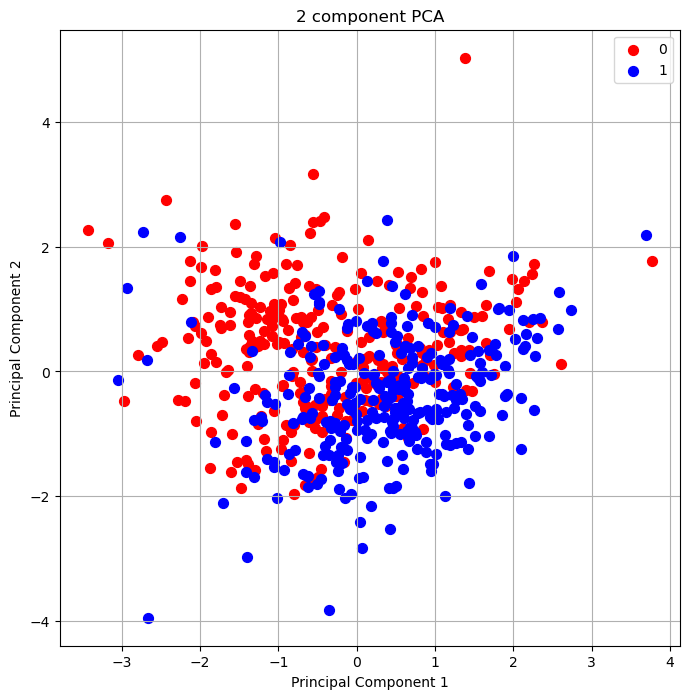

In [166]:
plt.figure(figsize=(8,8))

targets = [0, 1]
colors = ['r', 'b']

for target, color in zip(targets, colors):
    indicesToKeep = finalDf[0] == target
    plt.scatter(finalDf.loc[indicesToKeep, 'principal component 1'],
                finalDf.loc[indicesToKeep, 'principal component 2'],
                c = color, s = 50)
    
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2 component PCA')
plt.legend(targets)
plt.grid(True)
plt.show()

In [148]:
pca.fit_transform(x_pca)

array([[-1.36461876,  1.37639325],
       [ 0.00550928, -0.79854077],
       [ 0.57993425, -1.3415224 ],
       ...,
       [-1.0670932 ,  0.86001527],
       [ 0.04396312, -1.37561994],
       [ 0.12550587,  1.44725201]])

In [167]:
# The first principal component (PC1) explains about 26.42% of the variance.
# The second principal component (PC2) explains about 21.54% of the variance.
# Combined, PC1 and PC2 account for approximately 47.96% of the total variance in your dataset.

# 52% of the variance remains unaccounted for in these two components.
print("Explained variance ratio:", pca.explained_variance_ratio_)

Explained variance ratio: [0.26424211 0.21544052]


In [168]:
print("Explained variance:", pca.explained_variance_)

Explained variance: [1.32341624 1.07900092]


In [169]:
# each principal component provide insights into how each original feature contributes to the 
# respective principal component


# Interpretation: PC1 is heavily influenced by sentiment_polarity, sentiment_subjectivity, 
# and negatively influenced by lexical_diversity and avg_sent_len. This component might be capturing 
# aspects of textual sentiment and complexity where higher sentiment and subjectivity associate with less 
# diversity and shorter sentences.

# Interpretation: PC2 shows a strong positive loading for lexical_diversity and sentiment_subjectivity 
# and a strong negative loading for noun_phrases_count. This suggests that PC2 might be distinguishing 
# texts based on their lexical richness and noun usage—potentially differentiating between more descriptive 
# or narrative-driven texts versus others.


# Get the loadings of the first two components
loadings = pca.components_.T

# Create a DataFrame of loadings for easier interpretation
df_loadings = pd.DataFrame(loadings, columns=['PC1', 'PC2'], index=features)
print(df_loadings)


                             PC1       PC2
avg_sent_len           -0.393873  0.366532
sentiment_polarity      0.595589  0.182106
sentiment_subjectivity  0.421554  0.454837
lexical_diversity      -0.490094  0.600366
noun_phrases_count     -0.268771 -0.514952


In [170]:
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x_pca)

principalDf = pd.DataFrame(data=principalComponents, columns=['PC1', 'PC2', 'PC3'])

finalDf = pd.concat([principalDf, y_pca], axis=1)

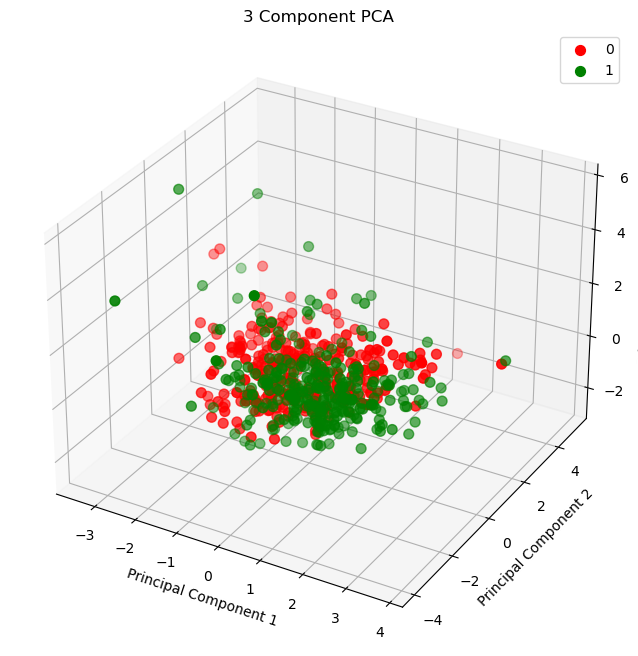

In [172]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

targets = [0, 1]
colors = ['r', 'g', 'b'] 

for target, color in zip(targets, colors):
    indicesToKeep = finalDf[0] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PC1'],
               finalDf.loc[indicesToKeep, 'PC2'],
               finalDf.loc[indicesToKeep, 'PC3'],
               c=color, s=50, label=target)

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3 Component PCA')
ax.legend(targets)
ax.grid(True)
plt.show()


In [173]:
print("Explained variance ratio:", pca.explained_variance_ratio_)

Explained variance ratio: [0.26424211 0.21544052 0.20323191]


In [174]:
loadings = pca.components_.T

df_loadings = pd.DataFrame(loadings, columns=['PC1', 'PC2', 'PC3'], index=features)
print(df_loadings)

                             PC1       PC2       PC3
avg_sent_len           -0.393873  0.366532  0.607790
sentiment_polarity      0.595589  0.182106  0.351813
sentiment_subjectivity  0.421554  0.454837  0.290528
lexical_diversity      -0.490094  0.600366 -0.156905
noun_phrases_count     -0.268771 -0.514952  0.630708


## KNN 

In [176]:
# 2 PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x_pca)
principalDf = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2'])
finalDf = pd.concat([principalDf, y_pca], axis = 1)

In [177]:
from sklearn.model_selection import train_test_split

x_knn = finalDf[['PC1', 'PC2']]  
y_knn = finalDf[0]  

X_train, X_test, y_train, y_test = train_test_split(x_knn, y_knn, test_size = 0.2, random_state = 42)

In [178]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [179]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_pred = knn.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")


[[41 25]
 [16 38]]
              precision    recall  f1-score   support

           0       0.72      0.62      0.67        66
           1       0.60      0.70      0.65        54

    accuracy                           0.66       120
   macro avg       0.66      0.66      0.66       120
weighted avg       0.67      0.66      0.66       120

Accuracy: 65.83%


In [180]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': np.arange(1, 25)}
knn_cv = GridSearchCV(knn, param_grid, cv=5)
knn_cv.fit(X_train, y_train)
print("Tuned KNN Parameters: {}".format(knn_cv.best_params_)) 
print("Best score is {}".format(knn_cv.best_score_))


Tuned KNN Parameters: {'n_neighbors': 16}
Best score is 0.71875


In [219]:
def predict_cluster(text, label, pca, knn_model, scaler):
    x, y = prepare_dataset([text], [label])
    x_scaled = scaler.fit_transform(x)
    p = pd.DataFrame(data = pca.transform(x_scaled), columns = ['PC1', 'PC2'])
    prediction = knn_model.predict(p)
    probabilities = knn_model.predict_proba(p)

    #confidence = np.max(probabilities) * 100  
    
    return prediction, probabilities 

In [221]:
#human written
txt = 'Humans should not use mobile phone while driving as it can lead to potential accident as the driver might get distracted and not focus on the road'
scaler = StandardScaler()

prediction, prob = predict_cluster(text, 1, pca, knn_cv, scaler)
print(1)
print(prediction)
print(prob)

100%|███████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.74it/s]

1
[0]
[[0.5 0.5]]


In [224]:
#ai written
txt = "Cell phones have become a necessity in today's fast-paced world. However, their use while driving has become a topic of debate due to the numerous accidents caused by distracted driving. While some argue that drivers should be allowed to use cell phones in certain capacities, others believe that their use while driving should be completely prohibited. In my opinion, drivers should not be able to use cell phones in any capacity while operating a vehicle. Firstly, using a cell phone while driving is a significant distraction that can lead to accidents. According to the National Highway Traffic Safety Administration, distracted driving claimed 3,142 lives in 2019. Cell phone use while driving is a form of distracted driving that takes the driver's attention away from the road, increasing the risk of accidents. Secondly, using a cell phone while driving impairs the driver's ability to react to changing road conditions. Studies have shown that drivers who use cell phones while driving have slower reaction times, making it difficult for them to avoid accidents. Moreover, using a cell phone while driving can also lead to tunnel vision, where the driver's peripheral vision is compromised, making it difficult to see other vehicles, pedestrians, or obstacles on the road. Thirdly, using a hands-free device while driving is not a safe alternative. While some argue that hands-free devices are safer than hand"
scaler = StandardScaler()

prediction, prob = predict_cluster(text, 0, pca, knn_cv, scaler)
print(0)
print(prediction)
print(prob)

100%|███████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.93it/s]

0
[0]
[[0.5 0.5]]


In [236]:
# 30 sample
text = df['Text']
label = df['LABEL']
x_test, y_test = prepare_dataset(text, label)
principalComponents = pca.fit_transform(x_test)
principalDf = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2'])
prediction = knn_cv.predict(principalDf)


100%|█████████████████████████████████████████████████████████████████████████| 60/60 [00:03<00:00, 17.02it/s]


In [237]:
prediction

array([0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0])

In [238]:
y_test

array([1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1])

In [239]:
np.sum(prediction[prediction == y_test])

12